In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

(-3.141592653589793, 3.141592653589793)

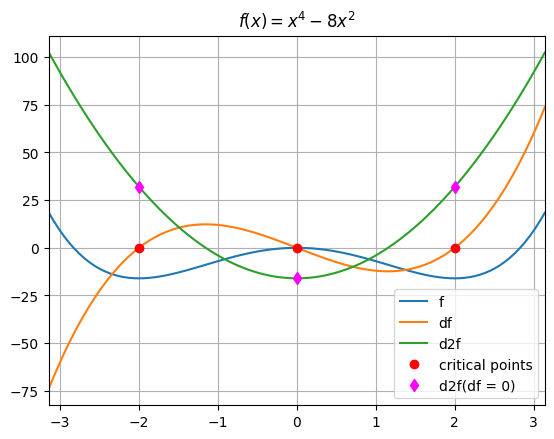

In [32]:
x = sym.symbols('x')

f = x**4 - 8*x**2
df = sym.diff(f,x)
d2f = sym.diff(f,x,2)

critical_points = sym.solve(df)
double_derivatives = []
for point in critical_points:
    double_derivatives.append(d2f.subs(x, point))

fx = sym.lambdify(x, f)
dfx = sym.lambdify(x, df)
d2fx = sym.lambdify(x, d2f)

xx = np.linspace(-np.pi, np.pi, 100)

plt.plot(xx, fx(xx), label='f')
plt.plot(xx, dfx(xx), label='df')
plt.plot(xx, d2fx(xx), label='d2f')
plt.plot(critical_points, [0,0,0], 'ro', label='critical points')
plt.plot(critical_points, double_derivatives, 'd', color='magenta', label='d2f(df = 0)')
plt.legend()
plt.grid()
plt.title(f"$f(x) = {sym.latex(f)}$")
plt.xlim([-np.pi, np.pi])

In [36]:
# Double Derivative Test
for i in range(len(critical_points)):
    if double_derivatives[i] < 0:
        print(f"f''({critical_points[i]}) is a local maximum")
    elif double_derivatives[i] > 0:
        print(f"f''({critical_points[i]}) is a local minimum")
    else:
        print(f"f''({critical_points[i]}) is inconclusive")

f''(-2) is a local minimum
f''(0) is a local maximum
f''(2) is a local minimum


In [75]:
# Function for the above.

def secondDerivativeTest(f,x):
    df = sym.diff(f,x)
    d2f = sym.diff(f,x,2)
    critical_points = sym.solve(df)
    if len(critical_points) == 0:
        print('no critical point')
    double_derivatives = []
    for point in critical_points:
        double_derivatives.append(d2f.subs(x, point))
    
    fx = sym.lambdify(x, f)
    dfx = sym.lambdify(x, df)
    d2fx = sym.lambdify(x, d2f)

    xx = np.linspace(-np.pi, np.pi, 1001)

    for i in range(len(critical_points)):
        if double_derivatives[i] < 0:
            print(f"f''({critical_points[i]}) is a local maximum")
        elif double_derivatives[i] > 0:
            print(f"f''({critical_points[i]}) is a local minimum")
        else:
            print(f"f''({critical_points[i]}) is inconclusive")


    plt.plot(xx, fx(xx), label='f')
    plt.plot(xx, dfx(xx), label='df')
    # print(len(d2fx(xx)))
    if (len(d2fx(xx)) == 1):
        # print(d2fx)
        # print(d2fx(xx))
        plt.plot(0,d2fx(xx), 'h', label='d2f')
    else:
        plt.plot(xx, d2fx(xx), label='d2f')
    plt.plot(critical_points, np.zeros(len(critical_points)), 'ro', label='critical points')
    plt.plot(critical_points, double_derivatives, 'd', color='magenta', label='d2f(df = 0)')
    plt.legend()
    plt.grid()
    plt.title(f"$f(x) = {sym.latex(f)}$")
    plt.xlim([-np.pi, np.pi])
    plt.show()

no critical point


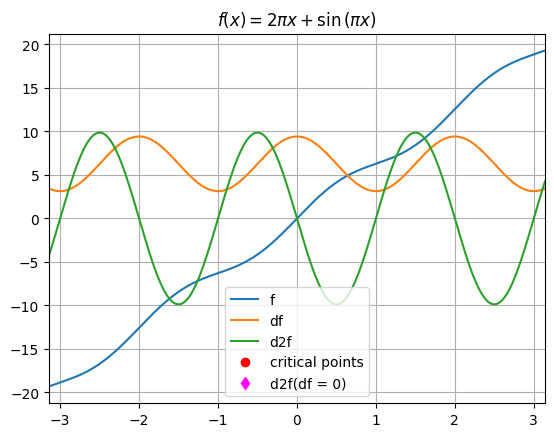

In [86]:
# Testing
x = sym.symbols('x', real=True)
y1 = x**4
y2 = - (y1)
y3 = x**3
y4 = 2*sym.pi*x + sym.sin(sym.pi*x)
secondDerivativeTest(y4, x)